In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

I will begin by importing the train and test data, adding a column that differentiates between both sets, concatenating the two data sets, cleaning the data, and adding transformations and dummy variables as needed.

I will then split the data into train and test before creating a model

# Data Import

In [93]:
# import train data
house_train = pd.read_csv('../datasets/train.csv')
house_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [94]:
# import test data
house_test = pd.read_csv('../datasets/test.csv')
house_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [95]:
# add column to differentiate between train (1) and test (0) data sets
house_train['data_type'] = 1
house_test['data_type'] = 0

In [96]:
# concatenate the data to clean/transform as needed
frames = [house_train, house_test]
df = pd.concat(frames)

In [97]:
# check that data was concatenated correctly
print(house_train.shape)
print(house_test.shape)
print(df.shape)
print(house_train.shape[0] + house_test.shape[0] == df.shape[0])

(2051, 82)
(878, 81)
(2929, 82)
True


# Cleaning Data and EDA

In [80]:
# When I plot the missing values for the full data set, train, and test separately, the graphs appear pretty similar. 
# Those null values may need to be zero instead.

In [98]:
features = ['Lot Area','Year Remod/Add', 'Yr Sold', 'Mo Sold', 'Neighborhood', 'MS Zoning', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Mas Vnr Area', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mo Sold', 'Yr Sold', 'SalePrice', 'data_type']
df = df[features]

In [99]:
df = pd.get_dummies(df, columns = ['MS Zoning', 'Neighborhood', 'Mo Sold', 'Yr Sold', 'Year Remod/Add'])

In [100]:
df_train = df[df['data_type'] == 1]
df_train.shape

(2051, 204)

In [101]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Garage Area       1
Garage Cars       1
Total Bsmt SF     1
Mas Vnr Area     22
dtype: int64

In [102]:
df_train = df_train.dropna()
df_train.shape

(2027, 204)

In [103]:
# values dropped
(2027-2051)/2051

-0.011701608971233545

In [104]:
df_test = df[df['data_type'] == 0]
df_test.shape

(878, 204)

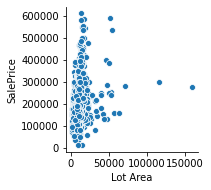

In [105]:
sns.pairplot(df_train, x_vars = ['Lot Area'], y_vars = ['SalePrice']);

In [106]:
df_train = df_train.drop(index = [694, 471])

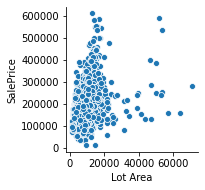

In [107]:
sns.pairplot(df_train, x_vars = ['Lot Area'], y_vars = ['SalePrice']);

In [112]:
# NEW
y = df_train['SalePrice']
X = df_train.drop(columns = ['SalePrice', 'data_type'])

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.7, random_state = 42)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [108]:
# Original

y = df_train['SalePrice']
X = df_train.drop(columns = ['SalePrice', 'data_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


# LASSO

In [114]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train_log);

y_pred_train = lasso_cv.predict(Z_train)
y_pred_test = lasso_cv.predict(Z_test)

mse_train = metrics.mean_squared_error(y_train_log, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("rmse_train: ", rmse_train)

mse_test = metrics.mean_squared_error(y_test_log, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("rmse_test: ", rmse_test)

cv_scores = cross_val_score(lasso_cv, X, y, cv=5).mean()
print('cv =', cv_scores)

rmse_train:  0.13008310934300535
rmse_test:  0.19153954020778372
cv = 0.8135995176209251


In [119]:
X_final = df_test.drop(columns = ['SalePrice', 'data_type'])
X_final = X_final.fillna(0)
X__final_overfit = poly.fit_transform(X_final)
Z_final = sc.transform(X__final_overfit)

y_pred_test2 = lasso_cv.predict(Z_final)

In [122]:
Answer = pd.DataFrame(house_test['Id'])
Answer['SalePrice'] = np.exp(y_pred_test2)
Answer.tail()

,Id,SalePrice
873,1662,181411.054050
874,1234,189078.420664
875,1373,133649.969914
876,1672,115946.137576
877,1939,121281.844964


In [123]:
Answer.to_csv('../datasets/submit_3.csv', index = False)

In [124]:
check = pd.read_csv('../datasets/submit_1.csv')

In [125]:
check.shape

(878, 2)

In [127]:
lasso_cv.alpha_

0.014174741629268055

In [110]:
y_pred_train

array([ 17422.22440702, 203231.27572928, 150550.49383683, ...,
       180594.26015214, 120433.20548433, 289446.20063975])

In [111]:
y_train_log

432     11.002100
1998    12.278393
1940    11.911702
1176    11.751942
788     12.221626
          ...    
1145    11.396392
1311    12.278393
872     11.775290
1479    11.774520
1141    12.691580
Name: SalePrice, Length: 1518, dtype: float64

# Linear Regression

In [91]:
lr = LinearRegression()
lr.fit(X_train,y_train_log)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_train = metrics.mean_squared_error(y_train_log, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("rmse_train: ", rmse_train)

mse_test = metrics.mean_squared_error(y_test_log, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("rmse_test: ", rmse_test)

cv_scores = cross_val_score(lr, X, y, cv=5).mean()
print('cv =', cv_scores)

rmse_train:  0.15788562458472913
rmse_test:  0.14143569558375743
cv = 0.8133303549703973


In [266]:
X_final = df_test.drop(columns = ['SalePrice', 'data_type'])

In [277]:
X_final = X_final.fillna(0)

Series([], dtype: int64)

In [278]:
SalePrice = lr.predict(X_final)

In [280]:
Answer = pd.DataFrame(house_test['Id'])
Answer['SalePrice'] = np.exp(SalePrice)
Answer.tail()

,Id,SalePrice
873,1662,176174.406206
874,1234,188793.301795
875,1373,132417.370218
876,1672,113843.167118
877,1939,117600.267734


In [281]:
Answer.to_csv('../datasets/submit_2.csv', index = False)

In [282]:
check = pd.read_csv('../datasets/submit_1.csv')

In [283]:
check.shape

(878, 2)

best predictors = continuous

MSSubClass: building class
MSZoning: general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale